---
# `P5` - *Procesos M/M/s*


Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.


## Parte 1 (40 %) Cantidad de servidores
Datos: 
$\lambda$ = 4 personas por minuto
$\nu = 0.25$ personas por minuto

Primero se establece la probabilidad de que suceda la condición de ruptura que es excederse de 50 personas en fila, por medio de la siguiente expresión:

$$
P( \text{51 o más clientes en el sistema} ) = \sum_{i=5}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51}
$$

$$
    \Longrightarrow P( \text{51 o más clientes en el sistema} ) = \rho^{51}   \;\;\;\;\;\; (1)
    \label{eq1}
$$

Se considera $\rho$ como:

$$
    \rho =  \frac{\lambda}{\nu} \;\;\;\;\;\; (2)
    \label{eq2}
$$

Por lo tanto, sustituyendo (2) en (1), se tiene:

$$
    P( \text{51 o más clientes en el sistema} ) = \left(\frac{\lambda}{\nu}\right)^{51}
$$

El sistema no debe excederse más de 50 personas en fila durante el 95% del tiempo de servicio, entonces:

$$
    P( \text{51 o más clientes en el sistema} ) = \left(\frac{\lambda}{\nu}\right)^{51} \leq 0.05
$$

Ya que es el 5% de probabilidad en donde puede ocurrir la ruptura. De forma que despejando $s$ de la expresión anterior:

$$
    \Longrightarrow s^{51} \geq \frac{\lambda^{51}}{0.05\nu^{51}}
$$

$$
   \Longrightarrow s \geq \frac{\lambda}{v} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    \Longrightarrow s \geq \frac{4}{0.25} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    \Longrightarrow s \geq 16,97
$$

Entonces, se deben tener al menos 17 servidores, los cuales son necesarios para que el sistema no exceda más de 50 personas en la fila durante el 95% del tiempo de servicio.


## Parte 2 (60 %) Verificación de resultados

Ahora se relizará el programa para verificar los resultados obtenidos en la primera sección.

In [2]:
# Se procede a implementar a partir del código dado una
# función que recibe los parámetros:
    # Los parámetros se definen como:
    #- N: Número de clientes
    #- nu: Parámetro de servicio (servicios/segundos)
    #- lam: Parámetro de llegada (clientes/segundos)
    #- ns: Número de servidores 
# Y además, da la gráfica de los resultados


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def programa(N, lam, nu, ns):

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/(ns*nu))

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)
        
        

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 51

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Número de servidores = ', str())
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 15000))
    plt.show()

## Simulaciones
Se correrá el código implementado para distintos valores.
Inicialmente se realiza la simulación con un número de servidores igual a $ns=17$, luego con $ns=18$ y $ns=16$.

Número de servidores =  17
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.24 horas.


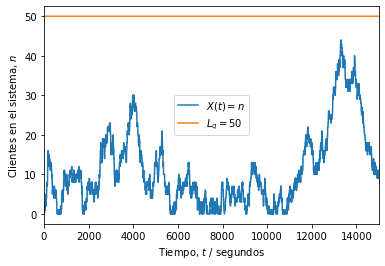

In [3]:
# Prueba para 17 servidores

# Se llama la función programa
programa(1000, (4/60), (0.25/60), 17)


Se realiza la simulación con un número de servidores mayor al número de servidores encontrado, para este caso se empleará ns=18

Número de servidores =  18
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.35 horas.


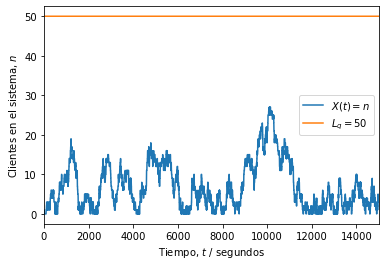

In [4]:
# Prueba para 18 servidores

# Se llama la función programa
programa(1000, (4/60), (0.25/60), 18)


Finalmente se simulará para un valor menor al esperado ns = 16

Número de servidores =  16
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 5.46%
	 No cumple con la especificación.
Simulación es equivalente a 4.38 horas.


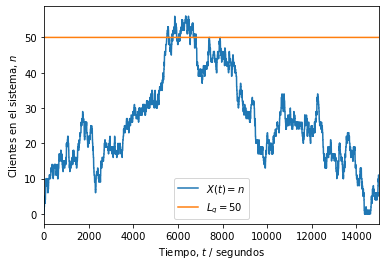

In [6]:
# Prueba para 16 servidores

# Se llama la función programa
programa(1000, (4/60), (0.25/60), 16)


## Análisis de resultados

A partir de las simulaciones anteriores, para una tasa de llegada de  $\lambda = 4$ personas por minuto, una tasa de servicio $\nu = 0.25$ personas por minuto, es necesario utilizar $ns= 17$ servidores para que el sistema no se sature; es decir, para no haya más de 50 personas en fila esperando la vacuna durante un 95% del tiempo. 

En la primera simulación se utilizaron 17 servidores, en la gráfica de resultado se observa que la cantidad de personas en la fila nunca supera los 50 individuos. El máximo alcanzado es de aproximadamente 45 personas; por lo tanto, no se alcanzó el máximo permitido en el 100% del tiempo activo.

En la segunda simulación se utilizó un servidor extra $ns=18$, lo cual resultó en el mismo caso anterior; sin embargo, el máximo alcanzado es mucho menor como era esperado. 

En la tercera simulación se utilizó $ns=16$, por lo que se esperaba que en algún punto se superara el máximo permitido de personas. En la gráfica de resultado se observa que en cierto momento las personas en la fila están entre 50 y 60 individuos, lo anterior significa que en un 5.46% del tiempo activo hubo más de 50 personas en la fila; sin embargo, otras iteraciones mostraban que la condición no se incumplía ya que el número de personas en la fila se mantenía bajo 50 o se cumplía la condición donde el número superaba las 50 personas pero se mantenía de esta manera menos de un 5% del tiempo. Como no se garantiza que la fila esté dentro del límite permitido durante el tiempo activo, se descarta el uso de 16 servidores. 

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---